In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size': 11})

In [ ]:
def I_rectangular(flexure_length):
    w = 4.0
    h = 0.8
    x = np.arange(-0.5 * flexure_length, 0.5 * flexure_length + 0.1, 0.1)
    n = np.shape(x)[0]
    I = np.repeat((w * h**3) / 12.0, n)
    return x, I

In [3]:
def I_circular_ideal(flexure_length):
    w = 4.0
    x = np.arange(-0.5 * flexure_length, 0.5 * flexure_length + 0.1, 0.1)
    r = 0.5 * flexure_length
    y = np.sqrt(r**2 - x**2)
    h = (0.8 + r) - y
    d = 0.5 * h - 0.4
    I = (w * h**3) / 12.0 + (w * h * d**2)
    return x, I

In [4]:
def I_circular_printed(flexure_length):
    w = 4.0
    n = np.round(0.5 * flexure_length / 0.2, 0)
    x = np.linspace(0.0, 0.5 * flexure_length, int(n + 2))
    a = 0.5 * flexure_length
    b = 0.2 * n
    y = np.sqrt(b**2 * (1.0 - ((x**2) / (a**2))))
    h = (0.8 + b) - y
    d = 0.5 * h - 0.4
    I = (w * h**3) / 12.0 + (w * h * d**2)
    return x, I

In [5]:
def I_cutout_oval(flexure_length, diameter):
    w_total = 4.0
    h_total = 1.0
    d = 0.5 * h_total - 0.4
    I_total = (w_total * h_total**3) / 12.0 + (w_total * h_total * d**2)

    x = np.arange(-0.5 * flexure_length, 0.5 * flexure_length + 0.1, 0.1)
    a = 0.5 * 4.0
    b = 0.5 * diameter
    y = np.sqrt(b**2 * (1.0 - ((x**2) / (a**2))))
    w_shape = 2.0 * y
    h_shape = 0.2
    d = (h_total - 0.5 * h_shape) - 0.4
    I_shape = (w_shape * h_shape**3) / 12.0 + (w_shape * h_shape * d**2)

    I = I_total - I_shape
    return x, I

In [6]:
def I_hourglass(flexure_length, apex_separation):
    w_base = 4.0
    h_base = 0.8
    I_base = (w_base * h_base**3) / 12.0
    b = 0.5 * apex_separation
    x_base = np.linspace(-b, b, 10)
    I_base_array = np.full(10, I_base)
    y = np.linspace(0.0, 2.0, 10)
    a = 0.25 * (0.5 * flexure_length - b)
    x = a * y**2 + b
    w_shape = 2.0 * y
    h_shape = 0.2
    d = 0.5 * (h_shape + h_base)
    I_shape = (w_shape * h_shape**3) / 12.0 + (w_shape * h_shape * d**2)
    I_total = I_base + I_shape
    x_all = np.concatenate((-np.flip(x), x_base, x), axis = None)
    I_all = np.concatenate((np.flip(I_total), I_base_array, I_total), axis = None)
    return x_all, I_all

In [7]:
def I_inverse_hourglass(flexure_length, apex_separation):
    w_base = 4.0
    h_base = 0.8
    I_base = (w_base * h_base**3) / 12.0
    x = np.arange(-0.5 * flexure_length, 0.5 * flexure_length + 0.1, 0.1)
    b = 0.5 * apex_separation
    a = (8.0 - 4.0 * b) / (flexure_length**2)
    y = a * x**2 + b
    w_shape = 2.0 * y
    h_shape = 0.2
    d = 0.5 * (h_shape + h_base)
    I_shape = (w_shape * h_shape**3) / 12.0 + (w_shape * h_shape * d**2)
    I_total = I_base + I_shape
    return x, I_total

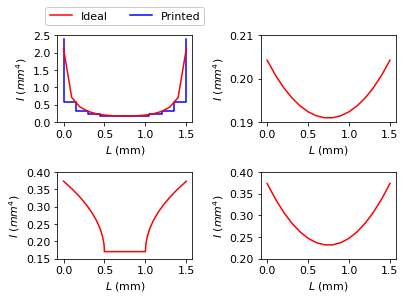

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (5.76, 4.32))

x, y = I_circular_printed(1.5)
line1 ,= ax[0, 0].step(x + 0.75, y, 'b-', where = 'post')
ax[0, 0].step(-np.flip(x) + 0.75, np.flip(y), 'b-', where = 'pre')
x, y = I_circular_ideal(1.5)
line2 ,= ax[0, 0].plot(x + 0.75, y, 'r-')
x, y = I_cutout_oval(1.5, 3.6)
ax[0, 1].plot(x + 0.75, y, 'r-')
x, y = I_hourglass(1.5, 0.5)
ax[1, 0].plot(x + 0.75, y, 'r-')
x, y = I_inverse_hourglass(1.5, 1.2)
ax[1, 1].plot(x + 0.75, y, 'r-')

ax[0, 0].set_xlabel(r'$L$ (mm)')
ax[0, 0].set_ylabel(r'$I$ ($mm^4$)')
ax[0, 1].set_xlabel(r'$L$ (mm)')
ax[0, 1].set_ylabel(r'$I$ ($mm^4$)')
ax[1, 0].set_xlabel(r'$L$ (mm)')
ax[1, 0].set_ylabel(r'$I$ ($mm^4$)')
ax[1, 1].set_xlabel(r'$L$ (mm)')
ax[1, 1].set_ylabel(r'$I$ ($mm^4$)')

xmin, xmax = ax[0, 0].get_xlim()
ax[0, 1].set_xlim(xmin, xmax)
ax[1, 0].set_xlim(xmin, xmax)
ax[1, 1].set_xlim(xmin, xmax)
ax[0, 0].set_xticks(np.arange(0.0, 1.6, 0.5))
ax[0, 1].set_xticks(np.arange(0.0, 1.6, 0.5))
ax[1, 0].set_xticks(np.arange(0.0, 1.6, 0.5))
ax[1, 1].set_xticks(np.arange(0.0, 1.6, 0.5))
ax[0, 0].set_ylim(0.0, 2.5)
ax[0, 1].set_ylim(0.19, 0.21)
ax[1, 0].set_ylim(0.15, 0.40)
ax[1, 1].set_ylim(0.20, 0.40)
ax[0, 0].set_yticks(np.arange(0.0, 2.6, 0.5))
ax[0, 1].set_yticks(np.arange(0.19, 0.22, 0.01))
ax[1, 0].set_yticks(np.arange(0.15, 0.41, 0.05))
ax[1, 1].set_yticks(np.arange(0.20, 0.41, 0.05))

ax[0, 0].legend([line2, line1], ['Ideal', 'Printed'], loc = 'lower center', bbox_to_anchor = (0.5, 1.05), ncol = 2, framealpha = 1)

plt.tight_layout()
plt.savefig('second_moment_of_area.pdf')
plt.show()